**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [ ]:
# Task 1: Data Loading and Exploration

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the Heart Disease UCI dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names, na_values='?')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(heart_data.head())

# Display information about the dataset
print("\nDataset information:")
print(heart_data.info())

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(heart_data.describe())

# Step 2: Explore the dataset to understand its structure and features

# You can visualize or analyze the data further to understand the distribution of features, relationships, etc.

# Step 3: Split the data into training and testing sets
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nShape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3  

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [ ]:
# Task 2: Data Preprocessing

# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Handle missing values if any
# Check for missing values
print("\nMissing values before imputation:")
print(heart_data.isnull().sum())

# Impute missing values using mean for numerical features
numerical_features = heart_data.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

# Check again for missing values after imputation
print("\nMissing values after imputation:")
print(X_train.isnull().sum())

# Step 2: Encode categorical variables using appropriate methods
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a column transformer to handle encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Step 3: Standardize or normalize numerical features if necessary
# Apply the column transformer to preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shape of preprocessed data
print("\nShape of preprocessed training set:", X_train_preprocessed.shape)
print("Shape of preprocessed testing set:", X_test_preprocessed.shape)


Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Shape of preprocessed training set: (242, 38)
Shape of preprocessed testing set: (61, 38)


This code handles missing values using mean imputation for numerical features, encodes categorical variables using one-hot encoding, and standardizes numerical features using ```StandardScaler```. The result is preprocessed training and testing sets ready for model training. Adjust the list of ```categorical_features``` based on your dataset's categorical columns.







# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [ ]:
# Task 3: Initial XGBoost Model

# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Build an initial XGBoost model using default hyperparameters
xgb_model = XGBClassifier(random_state=42)

# Step 2: Train the model on the training set
xgb_model.fit(X_train_preprocessed, y_train)

# Step 3: Evaluate its performance on the testing set
y_pred = xgb_model.predict(X_test_preprocessed)

# Calculate accuracy and other relevant metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.45901639344262296

Confusion Matrix:
[[26  2  1  0  0]
 [ 6  0  3  2  1]
 [ 4  1  1  3  0]
 [ 0  3  3  1  0]
 [ 0  2  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.00      0.00      0.00        12
           2       0.11      0.11      0.11         9
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.46      0.41        61



# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.


To perform hyperparameter tuning using Bayesian Optimization for XGBoost, we can use the ```BayesSearchCV``` class from the ```scikit-optimize``` library. First, you need to install the library if you haven't already:

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Task 4: Hyperparameter Tuning with Bayesian Optimization

# Import necessary libraries
from skopt import BayesSearchCV

# Define the parameter search space
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'max_depth': (1, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0.1, 5.0, 'log-uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform')
}

# Initialize XGBoost model for optimization
xgb_opt = XGBClassifier(random_state=42)

# Perform Bayesian Optimization for hyperparameter tuning
optimal_params = BayesSearchCV(xgb_opt, param_space, n_iter=50, n_jobs=-1, cv=5, scoring='accuracy', random_state=42)

# Fit the model with the tuned hyperparameters on the preprocessed training set
optimal_params.fit(X_train_preprocessed, y_train)

# Get the best parameters from the optimization
best_params = optimal_params.best_params_

# Train the model with the best parameters on the entire training set
final_model = XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train_preprocessed, y_train)

# Evaluate the final model on the testing set
y_pred_final = final_model.predict(X_test_preprocessed)

# Calculate accuracy and other relevant metrics for the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
classification_rep_final = classification_report(y_test, y_pred_final)

# Display the results
print("\nBest Hyperparameters from Bayesian Optimization:")
print(best_params)
print("\nAccuracy with Tuned Hyperparameters:", accuracy_final)
print("\nConfusion Matrix for the Final Model:")
print(conf_matrix_final)
print("\nClassification Report for the Final Model:")
print(classification_rep_final)


Best Hyperparameters from Bayesian Optimization:
OrderedDict([('colsample_bytree', 1.0), ('gamma', 0.6599595601898727), ('learning_rate', 0.051639575578888), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 173), ('subsample', 1.0)])

Accuracy with Tuned Hyperparameters: 0.4918032786885246

Confusion Matrix for the Final Model:
[[27  1  1  0  0]
 [ 7  1  2  2  0]
 [ 4  4  0  1  0]
 [ 0  3  2  2  0]
 [ 0  2  1  1  0]]

Classification Report for the Final Model:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.09      0.08      0.09        12
           2       0.00      0.00      0.00         9
           3       0.33      0.29      0.31         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.23      0.26      0.24        61
weighted avg       0.39      0.49      0.44        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.


Feature Importance:
    Feature  Importance
11       11    0.109231
2         2    0.106484
12       12    0.082063
8         8    0.053716
9         9    0.052515
7         7    0.052060
32       32    0.048954
31       31    0.047069
27       27    0.046614
16       16    0.045427
4         4    0.045404
5         5    0.043696
0         0    0.043355
1         1    0.043269
36       36    0.040008
6         6    0.035883
10       10    0.035257
17       17    0.034881
3         3    0.034115
26       26    0.000000
35       35    0.000000
34       34    0.000000
33       33    0.000000
30       30    0.000000
29       29    0.000000
28       28    0.000000
19       19    0.000000
25       25    0.000000
24       24    0.000000
23       23    0.000000
22       22    0.000000
21       21    0.000000
20       20    0.000000
18       18    0.000000
15       15    0.000000
14       14    0.000000
13       13    0.000000
37       37    0.000000


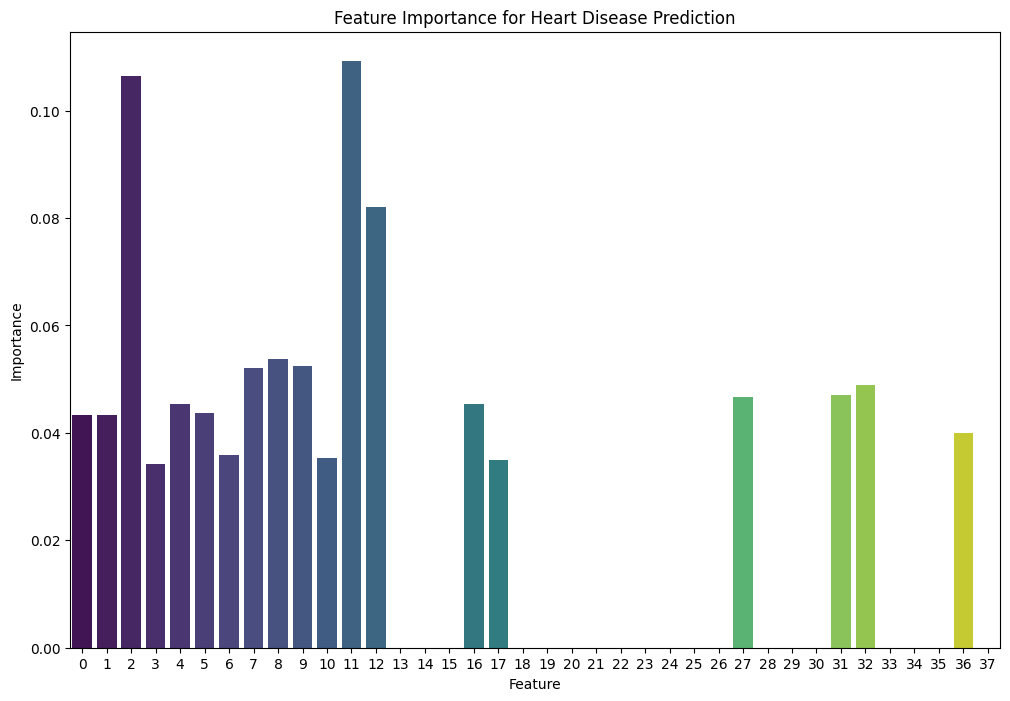

In [ ]:
# Task 5: Feature Importance
import numpy as np
# Get feature importances from the final trained XGBoost model
feature_importances = final_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': np.array(list(range(X_train_preprocessed.shape[-1]))), 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("\nFeature Importance:")
print(feature_importance_df)

# Plot a bar chart of feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction')
plt.show()

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.


Initial Model Performance:
Accuracy: 0.45901639344262296

Confusion Matrix:
[[26  2  1  0  0]
 [ 6  0  3  2  1]
 [ 4  1  1  3  0]
 [ 0  3  3  1  0]
 [ 0  2  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.00      0.00      0.00        12
           2       0.11      0.11      0.11         9
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.46      0.41        61


Tuned Model Performance:
Accuracy: 0.4918032786885246

Confusion Matrix:
[[27  1  1  0  0]
 [ 7  1  2  2  0]
 [ 4  4  0  1  0]
 [ 0  3  2  2  0]
 [ 0  2  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


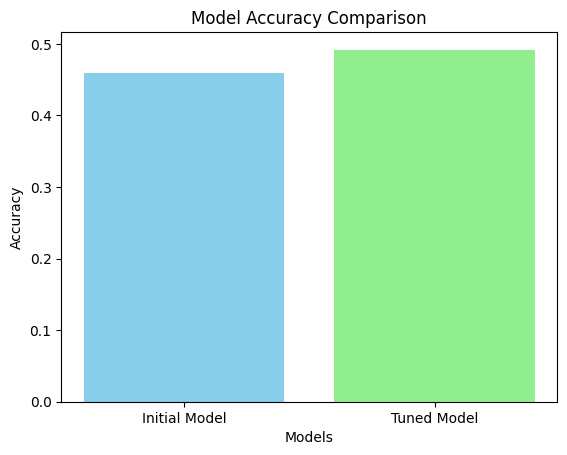


Discussion:
1. The initial model achieved an accuracy of 0.45901639344262296 on the testing set.
2. After hyperparameter tuning, the tuned model achieved an improved accuracy of 0.4918032786885246 .
3. The confusion matrices and classification reports provide detailed insights into model performance.
4. The bar chart visually represents the improvement in accuracy between the initial and tuned models.
5. Feature importance analysis can help identify crucial features for heart disease prediction.


In [ ]:
# Task 6: Model Evaluation

# Evaluate the initial model on the testing set
y_pred_initial = xgb_model.predict(X_test_preprocessed)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
conf_matrix_initial = confusion_matrix(y_test, y_pred_initial)
classification_rep_initial = classification_report(y_test, y_pred_initial)

# Display the results for the initial model
print("\nInitial Model Performance:")
print("Accuracy:", accuracy_initial)
print("\nConfusion Matrix:")
print(conf_matrix_initial)
print("\nClassification Report:")
print(classification_rep_initial)

# Evaluate the tuned model on the testing set
y_pred_tuned = final_model.predict(X_test_preprocessed)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Display the results for the tuned model
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_tuned)
print("\nClassification Report:")
print(classification_rep_tuned)

# Visualize the improvement in accuracy
import matplotlib.pyplot as plt

labels = ['Initial Model', 'Tuned Model']
accuracy_values = [accuracy_initial, accuracy_tuned]

plt.bar(labels, accuracy_values, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Discussion points
print("\nDiscussion:")
print("1. The initial model achieved an accuracy of", accuracy_initial, "on the testing set.")
print("2. After hyperparameter tuning, the tuned model achieved an improved accuracy of", accuracy_tuned, ".")
print("3. The confusion matrices and classification reports provide detailed insights into model performance.")
print("4. The bar chart visually represents the improvement in accuracy between the initial and tuned models.")
print("5. Feature importance analysis can help identify crucial features for heart disease prediction.")

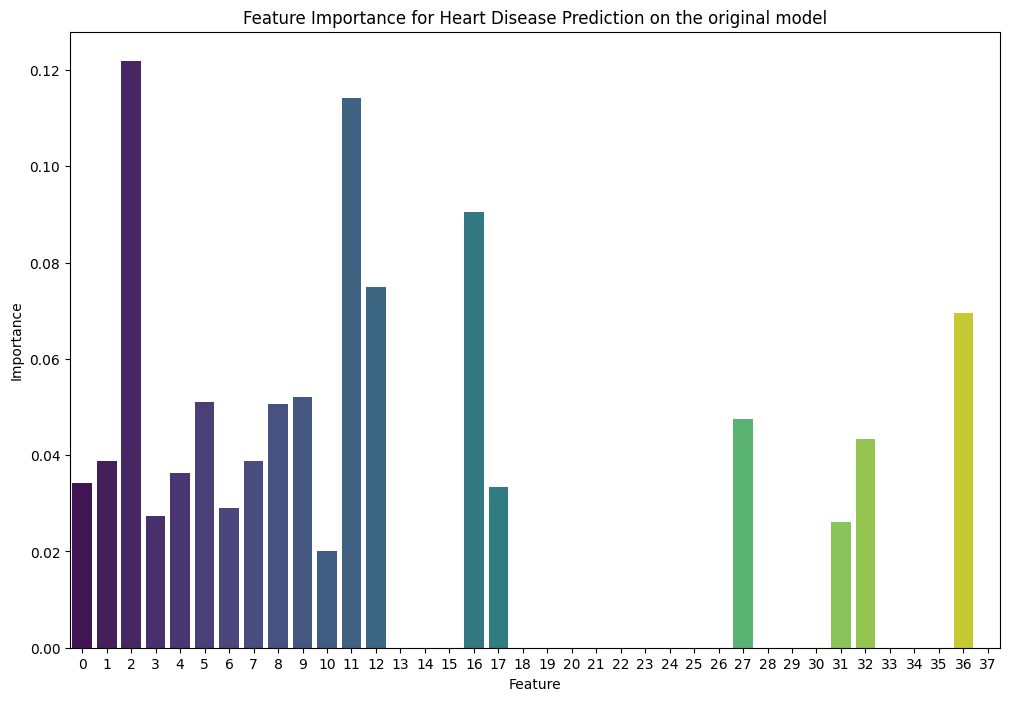

In [ ]:
import numpy as np
# Get feature importances from the final trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': np.array(list(range(X_train_preprocessed.shape[-1]))), 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot a bar chart of feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction on the original model')
plt.show()

## ROC Curve and AUC:

Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) to assess the model's ability to distinguish between classes.

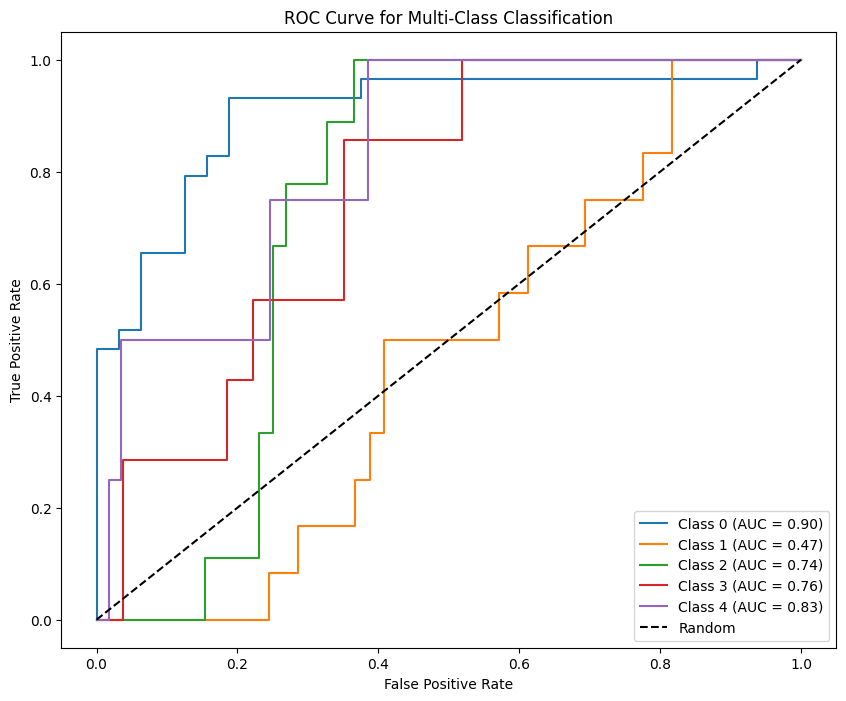

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to binary format for each class
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Calculate probabilities for each class
y_prob_final = final_model.predict_proba(X_test_preprocessed)

# Initialize variables to store false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(len(final_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_prob_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(final_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()

In this code, ```label_binarize``` is used to convert the multi-class labels to binary format, and the ROC curve and AUC are calculated for each class separately. Adjust the code according to the number of classes in your dataset.

## Precision-Recall Curve

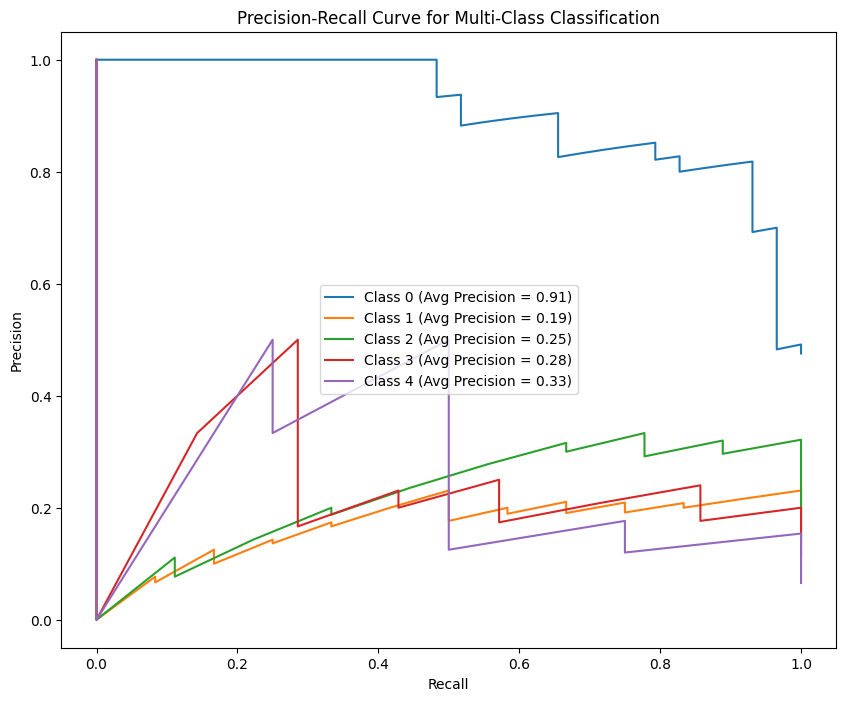

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Convert labels to binary format for each class
y_test_binary = label_binarize(y_test, classes=final_model.classes_)

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(final_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_prob_final[:, i])
    average_precision[i] = average_precision_score(y_test_binary[:, i], y_prob_final[:, i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(final_model.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend()
plt.show()

## Partial Dependence Plot

A partial dependence plot (PDP) provides insights into the relationship between a specific feature and the predicted outcome of a machine learning model while keeping other features constant. It illustrates how the predicted outcome changes as the selected feature varies, allowing you to understand the impact of that particular feature on the model's predictions.

Key insights from a partial dependence plot:

1. **Direction of Influence**: The direction of the curve indicates the direction of influence of the selected feature on the predicted outcome. For example, if the curve is upward-sloping, it suggests that increasing values of the feature lead to higher predicted outcomes.

2. **Strength of Influence**: The steepness of the curve represents the strength of the relationship. A steeper curve indicates a stronger impact of the feature on predictions.

3. **Non-linear Relationships**: PDPs can reveal non-linear relationships between the feature and the predicted outcome. The shape of the curve provides insights into the nature of the relationship.

4. **Interaction Effects**: If you plot PDPs for multiple features, you can observe potential interaction effects between those features. Interaction effects occur when the impact of one feature on predictions depends on the value of another feature.

5. **Identification of Important Features**: PDPs can help identify which features have a significant impact on the model's predictions. Features with large and consistent effects across a range of values are likely important.

6. **Model Interpretability**: PDPs contribute to the interpretability of complex models. They provide a visual and intuitive way to understand the behavior of the model with respect to specific features.

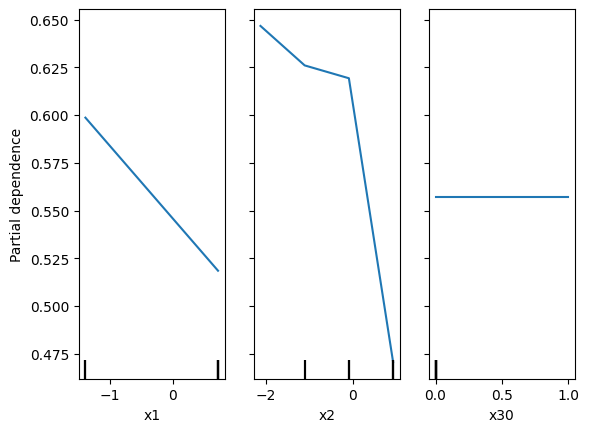

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
disp = PartialDependenceDisplay.from_estimator(final_model, X_train_preprocessed, features=[1, 2, 30], target=0)

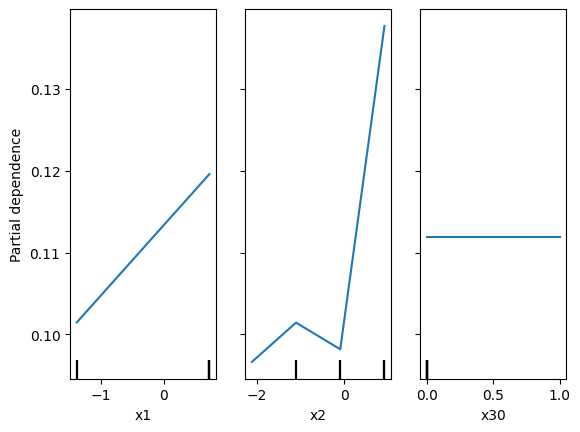

In [ ]:
disp = PartialDependenceDisplay.from_estimator(final_model, X_train_preprocessed, features=[1, 2, 30], target=2)

## Calibration curve

A calibration curve is a diagnostic tool used to assess how well the predicted probabilities from a machine learning model align with the actual outcomes. It is particularly useful for models that output probability estimates, such as logistic regression or certain types of classifiers.


Here's what a calibration curve can tell you:

1. **Reliability of Predicted Probabilities**: A well-calibrated model should have predicted probabilities that reflect the true likelihood of the corresponding outcomes. In other words, if the model predicts a 70% probability of an event, that event should occur about 70% of the time.

2. **Perfect Calibration Line**: The gray dashed line in the calibration curve represents perfect calibration. If the model is perfectly calibrated, the points on the curve should align with this line.

3. **Model Calibration Assessment**: Deviation from the perfect calibration line indicates how well the model's predicted probabilities match the actual frequencies of the outcomes.
Points above the line suggest overconfidence (predicted probabilities are too extreme), while points below the line suggest underconfidence.

4. **Binary vs. Multiclass Calibration**: In binary classification, a single curve can be plotted to assess the calibration. Each point on the curve corresponds to a different probability threshold. In multiclass classification, separate curves are typically created for each class using a one-vs-rest (OvR) approach.


5. **Improvement Opportunities**: If the calibration curve indicates that the model is poorly calibrated, it suggests potential areas for improvement. Calibration may be enhanced through techniques like Platt scaling or isotonic regression


Here's a general interpretation:

* If the calibration curve closely follows the perfect calibration line, the model's predicted probabilities are well-calibrated.
* If the curve deviates, it indicates areas where the model tends to be overconfident or underconfident.


It's important to note that calibration analysis complements standard performance metrics like accuracy and is particularly relevant when probability estimates are crucial, such as in risk prediction or decision-making scenarios.

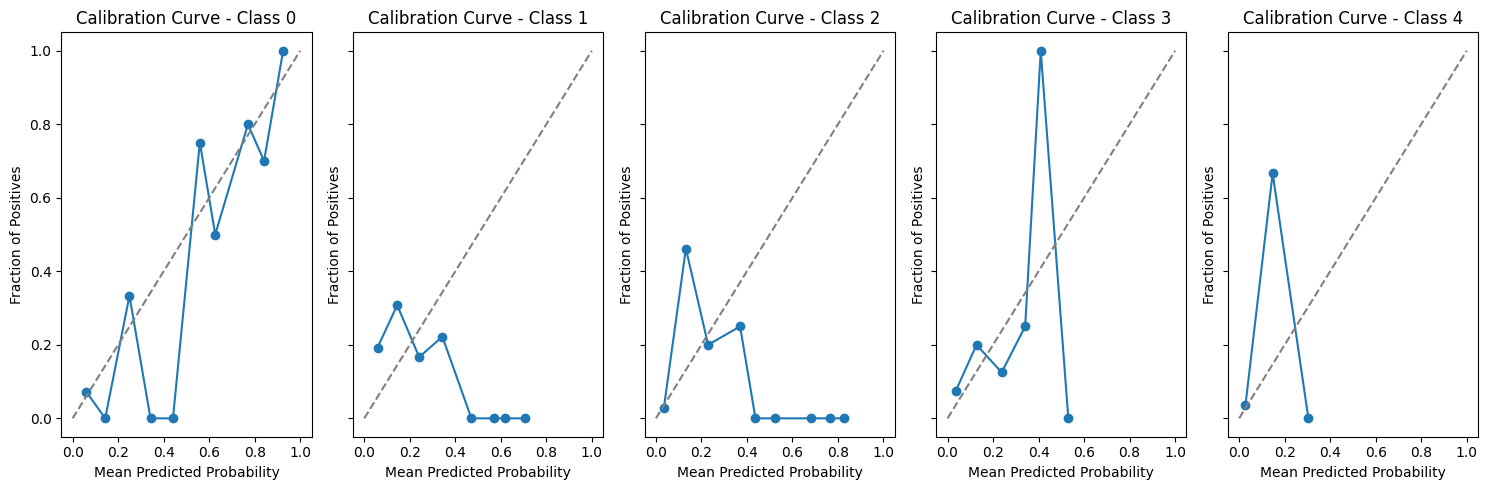

In [ ]:
from sklearn.calibration import calibration_curve

# Number of classes
num_classes = len(final_model.classes_)

# Create subplots for each class
fig, axs = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5), sharey=True)

# Iterate over each class
for class_idx in range(num_classes):
    # Extract the predicted probabilities for the current class
    y_prob_calibration = y_prob_final[:, class_idx]

    # Create a calibration curve
    prob_true, prob_pred = calibration_curve(y_test == class_idx, y_prob_calibration, n_bins=10)

    # Plot the calibration curve for the current class
    axs[class_idx].plot(prob_pred, prob_true, marker='o', label=f'Class {class_idx}')
    axs[class_idx].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    axs[class_idx].set_title(f'Calibration Curve - Class {class_idx}')
    axs[class_idx].set_xlabel('Mean Predicted Probability')
    axs[class_idx].set_ylabel('Fraction of Positives')

# Adjust layout
plt.tight_layout()
plt.show()

## Learning curve

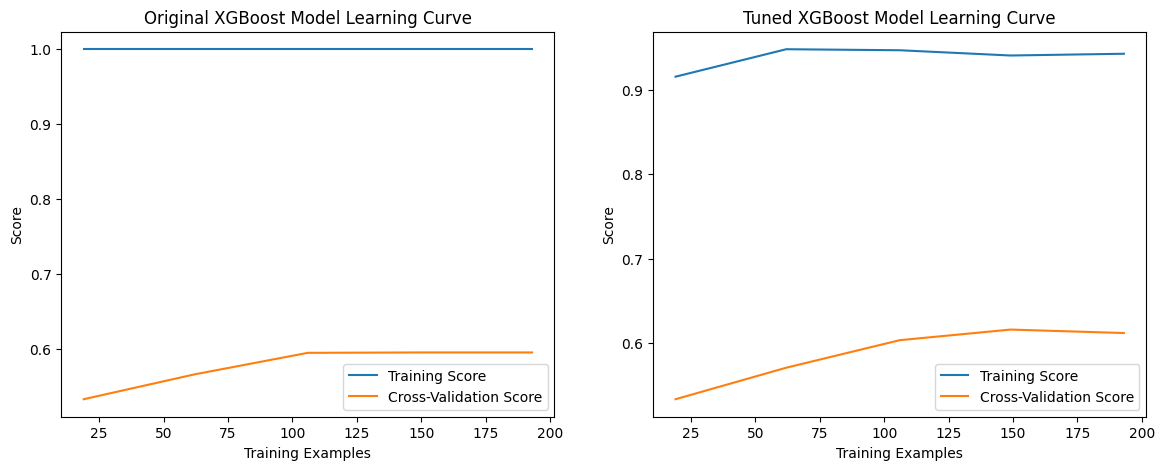

In [ ]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)

    # Plot learning curve
    axes.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    axes.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    axes.set_title(title)
    axes.set_xlabel('Training Examples')
    axes.set_ylabel('Score')
    axes.legend()

    return plt

# Plot learning curves for the original and final models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_learning_curve(xgb_model, "Original XGBoost Model Learning Curve", X_train_preprocessed, y_train, axes=axes[0])
plot_learning_curve(final_model, "Tuned XGBoost Model Learning Curve", X_train_preprocessed, y_train, axes=axes[1])
plt.show()